# Redes Neurais

## Backpropagation 

In [1]:
import numpy as np
np.set_printoptions(suppress=True, precision=5)
import math

In [2]:
# Função de ativação Sigmoid
def sigmoid(x):     
    return 1 /(1+(math.e**-x))

# Função derivada da função Sigmoid (para cálculo do gradiente)
def deriv_sigmoid(y):
    return y * (1.0 - y)   

In [3]:
# Learning rate
alpha = .1   

In [4]:
# Gerando dados aleatórios para x e y
# X será o dataset com 3 features (3 atributos)
X = np.array([  [.35,.21,.33],
                [.2,.4,.3],
                [.4,.34,.5],
                [.18,.21,16] ])                

y = np.array([[0],
        [1],
        [1],
        [0]])

In [5]:
2*np.random.random((3,4))

array([[0.25907, 0.02075, 0.23095, 0.98812],
       [1.55593, 0.04489, 0.16044, 1.85056],
       [1.62742, 1.24731, 0.76557, 0.77184]])

In [6]:
# Inicializando randomicamente os vetores de pesos (serão criadas 2 camadas ocultas)
np.random.seed(1)
theta0 = 2*np.random.random((3,4)) - 1
theta1 = 2*np.random.random((4,1)) - 1

In [7]:
theta0

array([[-0.16596,  0.44065, -0.99977, -0.39533],
       [-0.70649, -0.81532, -0.62748, -0.30888],
       [-0.20647,  0.07763, -0.16161,  0.37044]])

In [8]:
theta1

array([[-0.5911 ],
       [ 0.75623],
       [-0.94522],
       [ 0.34094]])

### Passos Realizados pelo Backpropagation

1- Feedforward pass: Inicializamos aleatoriamente os vetores de peso e multiplicamos a entrada com os vetores de peso subsequentes em direção a uma saída final.

2- Cálculo do erro: Calculamos o erro / perda da saída do passo de feedforward.

3- Backpropagation para a última camada oculta (em relação à saída): Calculamos o gradiente desse erro e alteramos os pesos para a direção do gradiente. Fazemos isso multiplicando o vetor de pesos pelos gradientes calculados.

4- Atualiza os pesos até o critério de parada ser atingido (erro mínimo ou número de rodadas de treinamento).

In [9]:
import sys

# Learning rate
alpha = .1   

# Inicializando randomicamente os vetores de pesos (serão criadas 2 camadas ocultas)
np.random.seed(1)
theta0 = 2*np.random.random((3,4)) - 1
theta1 = 2*np.random.random((4,1)) - 1

# Loop for para percorrer a rede neural
# O valor 205000 especifica a quantidade de rounds de treinamento
epoch = 205000
erros = []
for iter in range(epoch): 
    # Etapa 1: Feedforward 
    input_layer = X
    l1 = sigmoid(np.dot(input_layer, theta0)) # camada 1
    l2 = sigmoid(np.dot(l1,theta1))           # camada 2

    # Etapa 2: Calculando o erro 
    l2_error = y - l2
    erro =  np.sum(l2_error**2) / l2_error.shape[0] 
    erros.append(erro * 1000)
    
    if (iter% 10000) == 0:
        acurácia = np.mean(1-(np.abs(l2_error)))
        sys.stderr.write('\rÉpoca: ' + str(iter) + '/' + str(epoch)+ '- Acurácia da Rede Neural: ' + \
                         str(np.mean(1-(np.abs(l2_error)))))
        #print ("Acurácia da Rede Neural: " + str(np.mean(1-(np.abs(l2_error)))))
        sys.stderr.flush()
        
    # Etapa 3: Calculando os gradientes de forma vetorizada 
    l2_delta = alpha * (l2_error * deriv_sigmoid(l2)) # alfa = taxa de aprendizagem
    l1_error = l2_delta.dot(theta1.T)
    l1_delta = alpha * (l1_error * deriv_sigmoid(l1))

    # Etapa 4 - Atualiza os vetores de pesos
    theta1 += l1.T.dot(l2_delta)
    theta0 += input_layer.T.dot(l1_delta)
    
print ("Acurácia Final da Rede Neural: " + str(np.mean(1-(np.abs(l2_error)))))

Época: 200000/205000- Acurácia da Rede Neural: 0.9839193930855848

Acurácia Final da Rede Neural: 0.9841874369972228


In [10]:
erros

[313.7351386062896,
 312.52773601989315,
 311.3040104250663,
 310.0641364452137,
 308.80839957497795,
 307.53721425124064,
 306.2511421829158,
 304.95091017600106,
 303.6374265024315,
 302.3117946930201,
 300.97532351154086,
 299.62953181774486,
 298.27614708085946,
 296.9170964860084,
 295.55448989707304,
 294.19059439680103,
 292.82780069291954,
 291.46858230950767,
 290.1154491087472,
 288.77089723187567,
 287.4373579344253,
 286.11714796078735,
 284.8124240265709,
 283.52514365957967,
 282.25703413231184,
 281.0095705691551,
 279.78396361288213,
 278.5811563700118,
 277.4018297913695,
 276.2464152279874,
 275.115112652291,
 274.0079129451671,
 272.92462269759034,
 271.8648901269213,
 270.8282309253983,
 269.8140531068013,
 268.8216801680896,
 267.8503721151877,
 266.89934410305995,
 265.9677826036589,
 265.05485914038735,
 264.1597417170366,
 263.2816041275535,
 262.4196333660748,
 261.57303537016554,
 260.7410393293595,
 259.92290078038747,
 259.1179036935549,
 258.3253617344038,


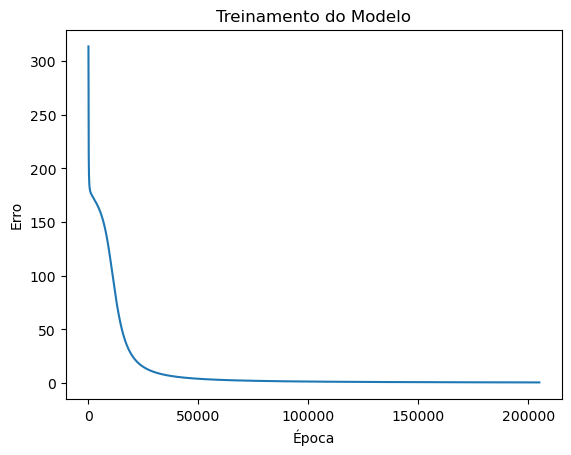

In [11]:
import matplotlib.pyplot as plt

plt.xlabel('Época')
plt.ylabel('Erro')
plt.title("Treinamento do Modelo")
plt.plot(erros)

In [ ]:
X = np.array([  [.35,.21,.33],
                [.2,.4,.3],
                [.4,.34,.5],
                [.18,.21,16] ])                

y = np.array([[0],
        [1],
        [1],
        [0]])

In [12]:
l2

array([[0.0308 ],
       [0.9996 ],
       [0.96995],
       [0.002  ]])

In [27]:
theta0

array([[-0.43554, -1.33897,  2.07582,  0.61846],
       [ 1.69134,  3.30059, -5.73135, -3.87994],
       [ 1.04697,  1.44528,  0.12695,  0.00167]])

In [28]:
theta1

array([[  5.04736],
       [ 13.18646],
       [-24.67672],
       [-16.25276]])

In [20]:
def predict(x1):
    # Etapa 1: Feedforward 
    input_layer = x1
    l1 = sigmoid(np.dot(input_layer, theta0)) # camada 1
    l2 = sigmoid(np.dot(l1,theta1))[0]
    classe = 1 if l2 > 0.5 else 0

    return classe

In [22]:
x1 = np.array([.35,.21,.33])
print(predict(x1))
x1 = np.array([.2,.4,.3])
print(predict(x1))

0
1


In [25]:
print(predict(np.array([.4,.34,.5])))

1


In [26]:
print(predict(np.array([.18,.21,16]))) 

0


---